# Allen brain institue Data Analysis
## Electrophysiology & morphology data

1. PCA analysis
2. spiny vs aspiny
3. Excitatory vs inhibitory - Cre mice line and cre reporter positive negative check!!

In [1]:
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('cell_data.csv')

In [3]:
data.head()

line_name  specimen__id                         specimen__name  \
0   Scnn1a-Tg2-Cre     313862022    Scnn1a-Tg2-Cre;Ai14-167081.03.02.01   
1   Rorb-IRES2-Cre     479508018  Rorb-IRES2-Cre-D;Ai14-196662.03.01.01   
2  Htr3a-Cre_NO152     442627661   Htr3a-Cre_NO152;Ai14-178904.06.01.01   
3     Cux2-CreERT2     487358945      Cux2-CreERT2;Ai14-214155.05.01.01   
4   Scnn1a-Tg3-Cre     469803127    Scnn1a-Tg3-Cre;Ai14-180215.05.02.01   

  specimen__hemisphere  structure__id               structure__name  \
0                right            721  Primary visual area, layer 4   
1                 left            721  Primary visual area, layer 4   
2                 left      312782566       Anterior area, layer 6a   
3                 left            778  Primary visual area, layer 5   
4                right            778  Primary visual area, layer 5   

  structure__acronym  structure_parent__id structure_parent__acronym  \
0              VISp4                   385                      VISp   
1              VISp4                   385                      VISp   
2             VISa6a             312782546                      VISa   
3              VISp5                   385                      VISp   
4              VISp5                   385                      VISp   

  structure__layer ...    cell_reporter_status  m__glif  \
0                4 ...   cre reporter positive        0   
1                4 ...   cre reporter positive        2   
2               6a ...   cre reporter positive        0   
3                5 ...   cre reporter positive        5   
4                5 ...   cre reporter positive        5   

   m__biophys_perisomatic  m__biophys_all_active  tag__apical  \
0                       1                      0       intact   
1                       0                      0       intact   
2                       0                      0          NaN   
3                       0                      0       intact   
4                       0                      0       intact   

   tag__dendrite_type                            morph_thumb_path  \
0               spiny  /api/v2/well_known_file_download/487659609   
1               spiny                                         NaN   
2              aspiny                                         NaN   
3               spiny                                         NaN   
4               spiny                                         NaN   

                             ephys_thumb_path  \
0  /api/v2/well_known_file_download/487623088   
1  /api/v2/well_known_file_download/491384619   
2  /api/v2/well_known_file_download/487610447   
3  /api/v2/well_known_file_download/487361512   
4  /api/v2/well_known_file_download/487635954   

                 ephys_inst_thresh_thumb_path   id  
0  /api/v2/well_known_file_download/491376069  606  
1  /api/v2/well_known_file_download/491384621  522  
2  /api/v2/well_known_file_download/491377923   81  
3  /api/v2/well_known_file_download/491767690   38  
4  /api/v2/well_known_file_download/491376335  671  

[5 rows x 44 columns]

In [4]:
data_cre = data[data['cell_reporter_status'] == 'cre reporter positive']
data_cre_neg = data[data['cell_reporter_status'] != 'cre reporter positive']

In [5]:
# subsetting data - only electrophysiological component for PCA
data_sub = data_cre.iloc[:,17:27]
len(data_sub)

615

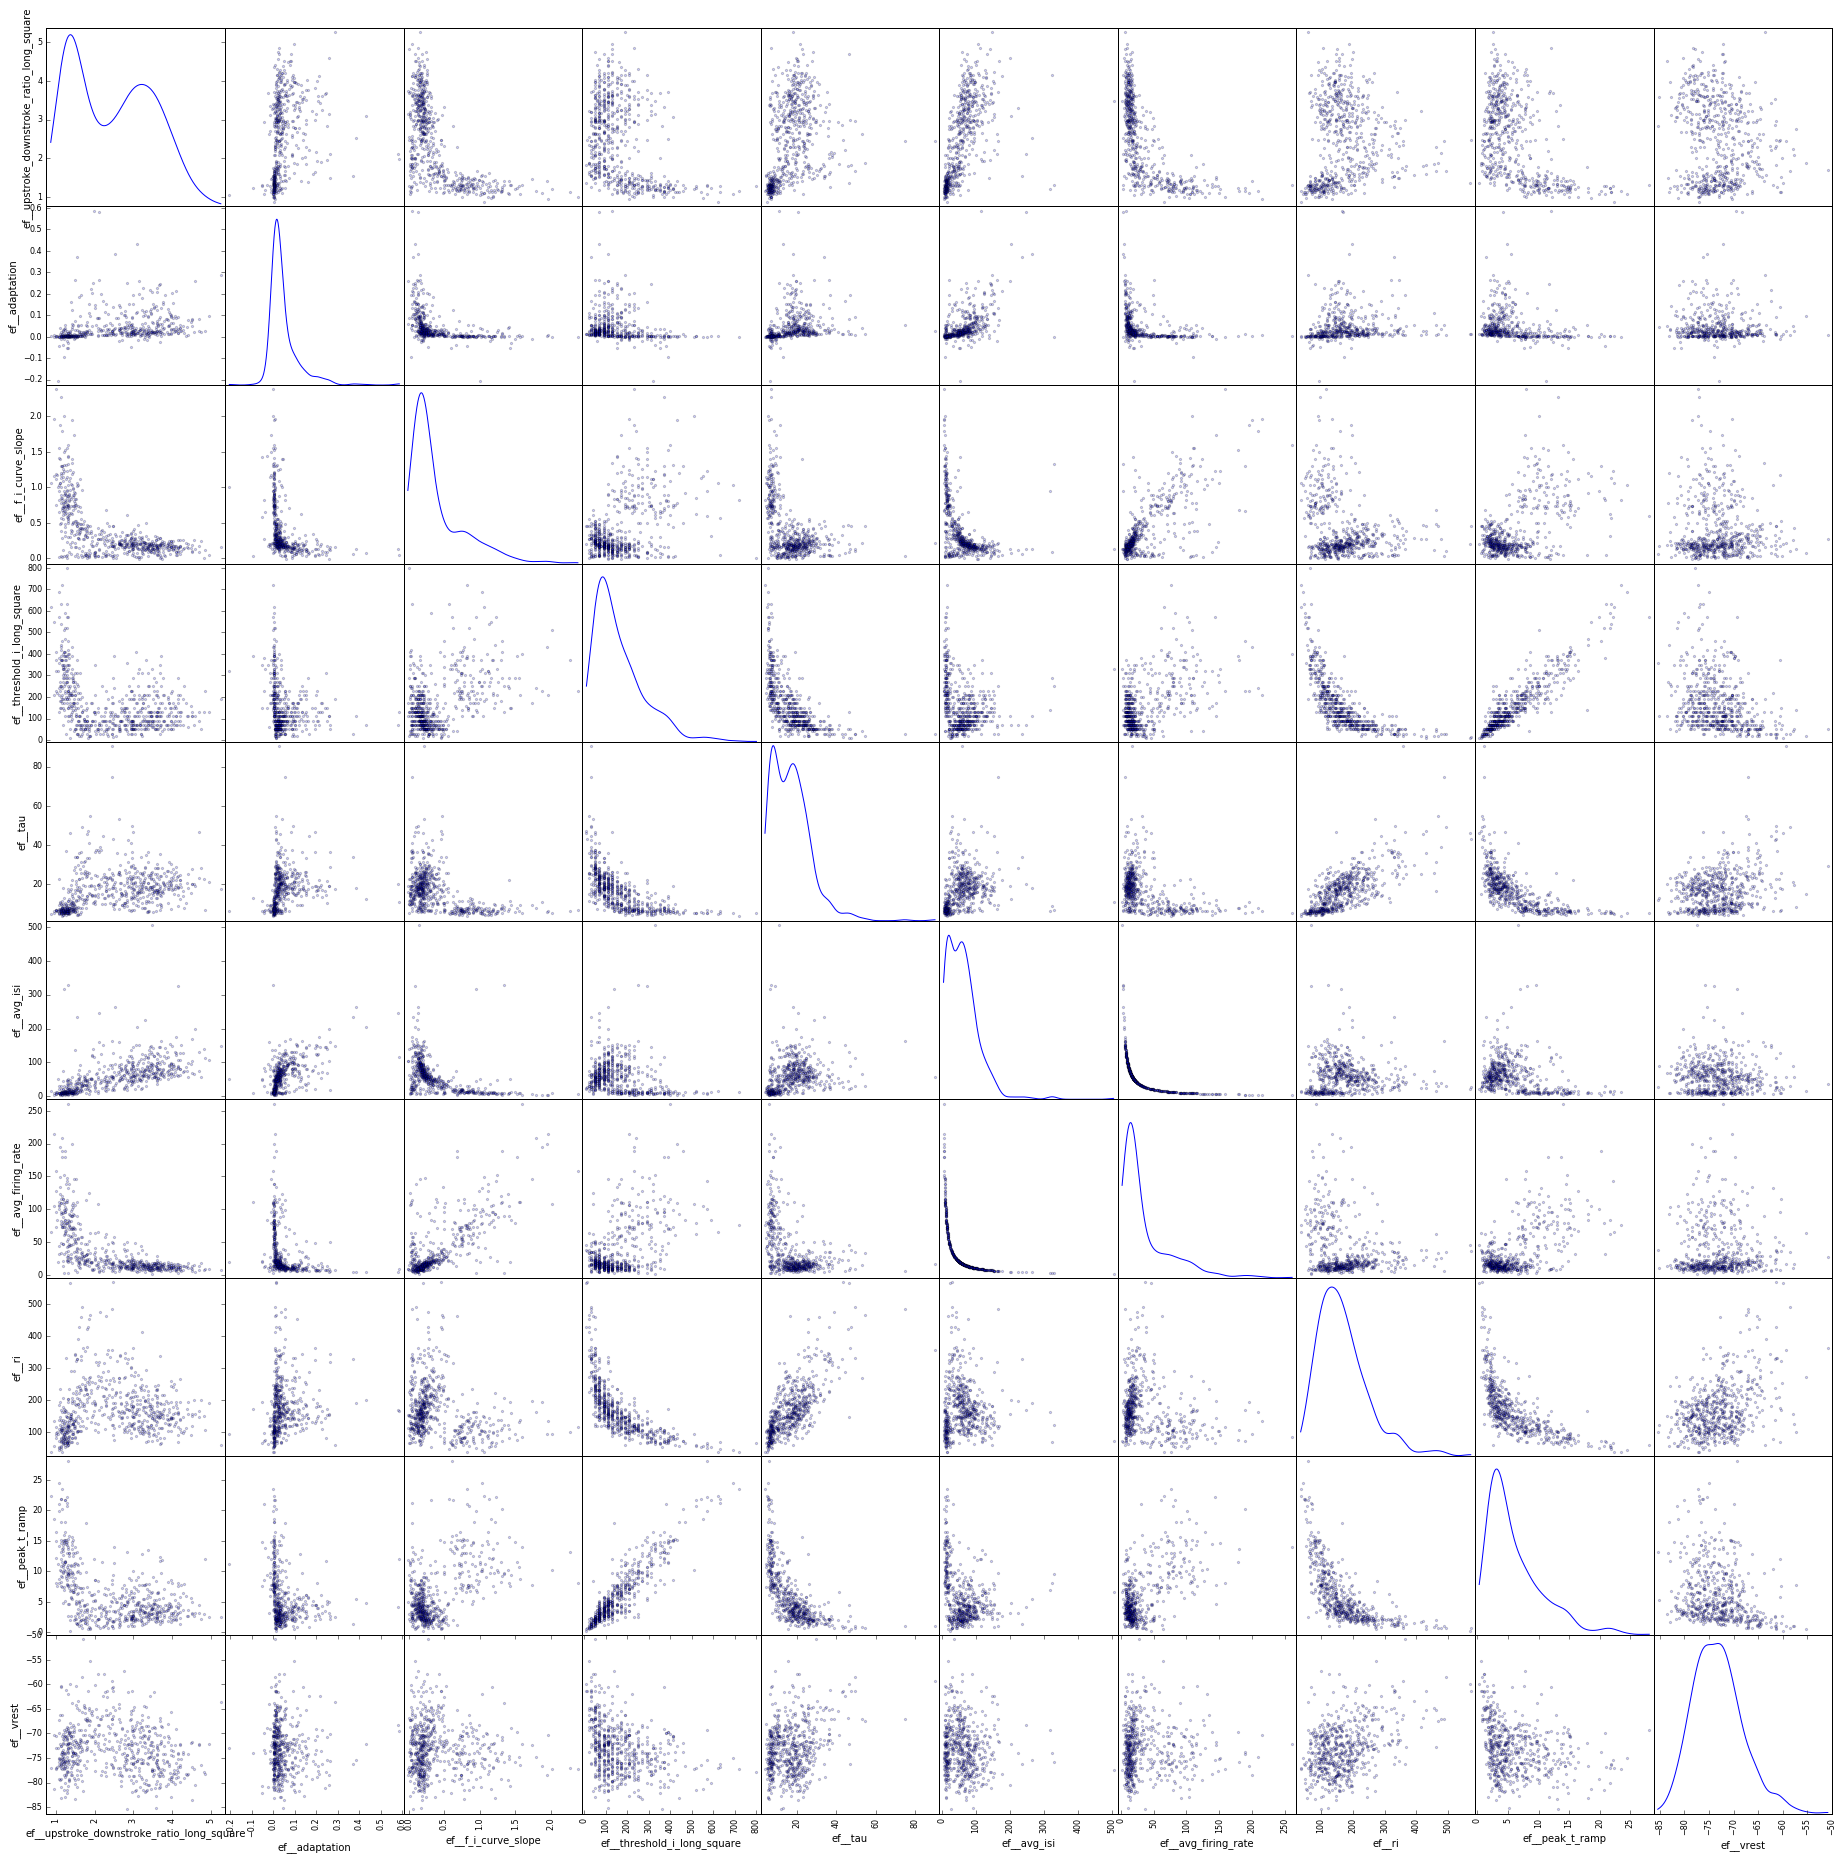

In [6]:
# scatter plotting for exporatory visualization
scatter = pd.tools.plotting.scatter_matrix(data_sub, alpha=0.2, figsize = (32,32), diagonal = 'kde')

In [7]:
data_sub_wona = data_sub.fillna(0) # making NaN value to zeros - reconsider this process why not remove?
sub_np = data_sub_wona.values # numpy array
sub_np = scale(sub_np) # normalization
# check scatter plot after scaling - doesn't change data pattern
# scatter_scaled = pd.tools.plotting.scatter_matrix(pd.DataFrame(sub_np), alpha=0.2, figsize = (32,32), diagonal = 'kde')

[  43.05   63.2    72.3    79.62   85.18   89.91   93.59   96.18   98.38
  100.  ]


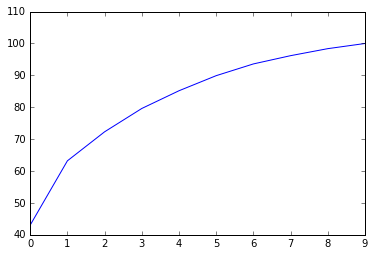

In [8]:
pca = PCA(n_components = 10)
pca.fit(sub_np)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1 #cumulative explained propotion in variation. 
plt.plot(var1)

In [9]:
np_pca=pca.fit_transform(sub_np) 

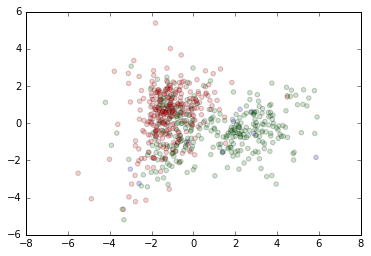

In [10]:
def color_dend(dendrite): # making color code according to dendritic morphology 
    output = []
    for item in dendrite:
        if item == 'spiny':
            output = output + ['r']
        elif item == 'aspiny':
            output = output + ['g']
        else:
            output = output + ['b']
    return output
dend_c = []
dend_c = color_dend(data['tag__dendrite_type'])

plt.scatter(np_pca[:,0], np_pca[:,1], c = dend_c, alpha = .2)

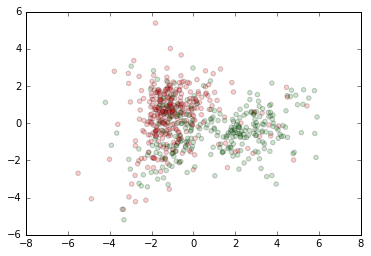

In [11]:
def color_EI(cre_line): # making color code for excitory vs inbihitory cre line
    output = []
    for item in cre_line:
        if (item == 'Pvalb-IRES-Cre' or item == 'Sst-IRES-Cre' or
            item == 'Htr3a-Cre_NO152' or item == 'Vip-IRES-Cre' or
            item == 'Gad2-IRES-Cre'):
                output = output + ['g']
        else:
            output = output + ['r']
    return output
EI_c = []
EI_c = color_EI(data['line_name'])

plt.scatter(np_pca[:,0], np_pca[:,1], c = EI_c, alpha = .2)

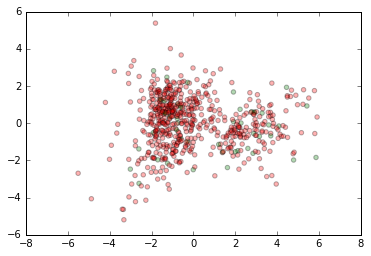

In [12]:
def item_iden(list1, list2):
    output = []
    for i, item in enumerate(list1):
        output = output + [item == list2[i]]
    return output

def color_iden(list1, list2):
    output = []
    for i, item in enumerate(list1):
        if item == list2[i]:
            output = output + ['r']
        else:
            output = output + ['g']
    return output
dend_EI_idendity = item_iden(dend_c, EI_c)
dend_EI_idendity_c = color_iden(dend_c, EI_c)

plt.scatter(np_pca[:,0], np_pca[:,1], c = dend_EI_idendity_c, alpha = .3)

In [13]:
dend_c_pd = pd.DataFrame({'dend_c': dend_c})
EI_c_pd = pd.DataFrame({'EI_c': EI_c})
dend_EI_idendical_pd = pd.DataFrame({'dend_EI_idendity': dend_EI_idendity})
idendical = dend_EI_idendical_pd.join(dend_c_pd.join(EI_c_pd))

In [14]:
new_data = data_cre.join(idendical)
new_data

line_name  specimen__id                             specimen__name  \
0     Scnn1a-Tg2-Cre     313862022        Scnn1a-Tg2-Cre;Ai14-167081.03.02.01   
1     Rorb-IRES2-Cre     479508018      Rorb-IRES2-Cre-D;Ai14-196662.03.01.01   
2    Htr3a-Cre_NO152     442627661       Htr3a-Cre_NO152;Ai14-178904.06.01.01   
3       Cux2-CreERT2     487358945          Cux2-CreERT2;Ai14-214155.05.01.01   
4     Scnn1a-Tg3-Cre     469803127        Scnn1a-Tg3-Cre;Ai14-180215.05.02.01   
5     Rbp4-Cre_KL100     325941643        Rbp4-Cre_KL100;Ai14-175331.06.01.01   
6     Rorb-IRES2-Cre     480171386      Rorb-IRES2-Cre-D;Ai14-197356.04.01.01   
7       Cux2-CreERT2     486560376          Cux2-CreERT2;Ai14-209118.03.01.01   
8       Cux2-CreERT2     490170480          Cux2-CreERT2;Ai14-214870.02.01.01   
9          Nr5a1-Cre     482726727             Nr5a1-Cre;Ai14-199362.05.01.01   
10    Rorb-IRES2-Cre     480114344      Rorb-IRES2-Cre-D;Ai14-197332.06.02.01   
11    Scnn1a-Tg3-Cre     476218657        Scnn1a-Tg3-Cre;Ai14-187852.04.02.01   
12    Rbp4-Cre_KL100     485835016        Rbp4-Cre_KL100;Ai14-204744.03.02.01   
16      Cux2-CreERT2     502808270          Cux2-CreERT2;Ai14-230639.05.01.01   
17    Rorb-IRES2-Cre     485884503      Rorb-IRES2-Cre-D;Ai14-204765.03.01.01   
18      Cux2-CreERT2     486239338          Cux2-CreERT2;Ai14-207760.03.01.01   
19   Htr3a-Cre_NO152     464188580       Htr3a-Cre_NO152;Ai14-178910.03.01.01   
20   Htr3a-Cre_NO152     469753383       Htr3a-Cre_NO152;Ai14-178904.04.01.01   
21    Rorb-IRES2-Cre     476562817      Rorb-IRES2-Cre-D;Ai14-188705.03.01.01   
22    Rbp4-Cre_KL100     485838981        Rbp4-Cre_KL100;Ai14-204744.04.02.01   
23     Ctgf-2A-dgCre     501956013  Ctgf-2A-dgCre;Ai14(IVSCC)-230021.05.01.01   
24    Rorb-IRES2-Cre     473020156      Rorb-IRES2-Cre-D;Ai14-181710.05.02.01   
25      Cux2-CreERT2     489887491          Cux2-CreERT2;Ai14-213727.03.02.01   
26      Cux2-CreERT2     483057325          Cux2-CreERT2;Ai14-198017.03.02.01   
27    Scnn1a-Tg3-Cre     314831019        Scnn1a-Tg3-Cre;Ai14-168093.03.02.01   
28    Rbp4-Cre_KL100     488117124        Rbp4-Cre_KL100;Ai14-211533.05.02.01   
29    Rorb-IRES2-Cre     486500736      Rorb-IRES2-Cre-D;Ai14-206927.05.01.01   
30    Rorb-IRES2-Cre     501848265      Rorb-IRES2-Cre-D;Ai14-228832.03.02.01   
31    Rbp4-Cre_KL100     471141261        Rbp4-Cre_KL100;Ai14-180747.02.01.01   
32    Rorb-IRES2-Cre     500859045      Rorb-IRES2-Cre-D;Ai14-226103.04.01.01   
..               ...           ...                                        ...   
658   Pvalb-IRES-Cre     320421014        Pvalb-IRES-Cre;Ai14-170929.03.01.01   
659   Pvalb-IRES-Cre     488501071        Pvalb-IRES-Cre;Ai14-212440.05.02.01   
660   Pvalb-IRES-Cre     313861539        Pvalb-IRES-Cre;Ai14-165171.06.02.01   
661   Pvalb-IRES-Cre     487667205        Pvalb-IRES-Cre;Ai14-212813.03.01.01   
662   Pvalb-IRES-Cre     500862585        Pvalb-IRES-Cre;Ai14-226400.04.01.01   
663   Pvalb-IRES-Cre     488230133        Pvalb-IRES-Cre;Ai14-212111.06.01.01   
664   Pvalb-IRES-Cre     464368713        Pvalb-IRES-Cre;Ai14-169128.05.01.01   
665   Pvalb-IRES-Cre     491038812        Pvalb-IRES-Cre;Ai14-214784.03.02.01   
666   Pvalb-IRES-Cre     488501487        Pvalb-IRES-Cre;Ai14-212440.04.02.01   
667   Pvalb-IRES-Cre     471088062        Pvalb-IRES-Cre;Ai14-180634.03.02.01   
669   Pvalb-IRES-Cre     482516631        Pvalb-IRES-Cre;Ai14-199001.06.02.01   
670   Pvalb-IRES-Cre     481096407        Pvalb-IRES-Cre;Ai14-198335.03.01.01   
671   Pvalb-IRES-Cre     484744672        Pvalb-IRES-Cre;Ai14-201773.05.01.01   
672   Pvalb-IRES-Cre     490386426        Pvalb-IRES-Cre;Ai14-215471.05.01.01   
673   Pvalb-IRES-Cre     482491330        Pvalb-IRES-Cre;Ai14-199001.03.02.01   
674     Sst-IRES-Cre     480171188          Sst-IRES-Cre;Ai14-197619.03.02.01   
675   Pvalb-IRES-Cre     341459814        Pvalb-IRES-Cre;Ai14-178310.05.01.01   
676   Pvalb-IRES-Cre     470062597        

In [15]:
dend_EI_diff = new_data[new_data['dend_EI_idendity'] == 0]
len(dend_EI_diff)

20

In [16]:
line_name_freq = pd.DataFrame(dend_EI_diff['line_name'].value_counts())
line_name_freq

line_name
Sst-IRES-Cre            10
Rorb-IRES2-Cre           4
Nr5a1-Cre                3
Htr3a-Cre_NO152          2
Scnn1a-Tg3-Cre           1

In [17]:
EI_freq = pd.DataFrame(dend_EI_diff['EI_c'].value_counts())
EI_freq # r = excitatory, g = inhibitory

EI_c
g    12
r     8

In [18]:
dend_freq = pd.DataFrame(dend_EI_diff['dend_c'].value_counts())
dend_freq # r = spiny, g = aspiny, b = sparsely spiny

dend_c
b       9
g       8
r       3

In [19]:
cre_freq = pd.DataFrame(dend_EI_diff['cell_reporter_status'].value_counts())
cre_freq 

cell_reporter_status
cre reporter positive                    20

In [20]:
dend_EI_diff.loc[:,['line_name','cell_reporter_status','dend_c', 'EI_c']]

line_name   cell_reporter_status dend_c EI_c
91      Sst-IRES-Cre  cre reporter positive      r    g
92    Rorb-IRES2-Cre  cre reporter positive      g    r
98         Nr5a1-Cre  cre reporter positive      g    r
163   Rorb-IRES2-Cre  cre reporter positive      g    r
242  Htr3a-Cre_NO152  cre reporter positive      r    g
252   Rorb-IRES2-Cre  cre reporter positive      g    r
263  Htr3a-Cre_NO152  cre reporter positive      r    g
292   Rorb-IRES2-Cre  cre reporter positive      g    r
297        Nr5a1-Cre  cre reporter positive      g    r
370   Scnn1a-Tg3-Cre  cre reporter positive      g    r
374     Sst-IRES-Cre  cre reporter positive      b    g
379     Sst-IRES-Cre  cre reporter positive      b    g
389     Sst-IRES-Cre  cre reporter positive      b    g
410     Sst-IRES-Cre  cre reporter positive      b    g
429     Sst-IRES-Cre  cre reporter positive      b    g
437     Sst-IRES-Cre  cre reporter positive      b    g
478        Nr5a1-Cre  cre reporter positive      g    r
494     Sst-IRES-Cre  cre reporter positive      b    g
509     Sst-IRES-Cre  cre reporter positive      b    g
510     Sst-IRES-Cre  cre reporter positive      b    g